# **Workshop 4: Data Encoding and Transformation**
**คำสั่ง**

1.   ศึกษาวิธีการเข้ารหัสข้อมูลเชิงกลุ่ม  (Categorical Data Encoding)และการทำให้เป็นมาตรฐาน (Normalization) สำหรับชุดข้อมูล adult ต่อไปนี้
2.   ทดลองทำการเข้ารหัสและการทำให้เป็นมาตรฐาน ตามคำสั่งปฏิบัติการแต่ละข้อ
3.   ตั้งชื่อไฟล์ python notebook นี้ในรูปแบบ Lab_04_XXXXXXXXX.ipynb โดย XXXXXXXXX คือ รหัสนักศึกษา
4.   ทำการดาวน์โหลดและส่งไฟล์ Lab_04_XXXXXXXXX.ipynb ที่เว็บไซต์ https://mango-cmu.instructure.com/courses/6152/assignments/47900

In [274]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [275]:
# นำเข้าไฟล์ข้อมูล adult.csv
data = pd.read_csv("adult.csv", na_values="?")
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [276]:
# นับจำนวนของ Missing Value ในแต่ละคอลัมน์
data.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [277]:
# axis=0 (default) drop ทิ้งทั้งแถวที่มีค่า Missing Value
data.dropna(subset = ["workclass","occupation","native.country"], inplace=True)
# เรียงลำดับเลข index ใหม่
data.reset_index(inplace=True,drop=True)
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
1,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
2,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
3,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
4,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [278]:
# First check datatype
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

**Encoding Categorical Data**

In [280]:
##### Dummy encoding for norminal variable #####
data = pd.get_dummies(data, columns=["workclass"], prefix=["workclass"])

# ตอนนี้ผลลัพธ์เป็น True-False อยากให้ df อยู่ในรูป 1-0, 0-1, 0-0
dummy_columns = [col for col in data.columns if 'workclass_' in col]
data[dummy_columns] = data[dummy_columns].astype(int)

data.head()

,age,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,...,hours.per.week,native.country,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
0,82,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,...,18,United-States,<=50K,0,0,1,0,0,0,0
1,54,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,...,40,United-States,<=50K,0,0,1,0,0,0,0
2,41,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,...,40,United-States,<=50K,0,0,1,0,0,0,0
3,34,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,...,45,United-States,<=50K,0,0,1,0,0,0,0
4,38,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,...,40,United-States,<=50K,0,0,1,0,0,0,0


In [281]:
##### One-hot Variable Encoding for norminal variable #####
one_hot_style = OneHotEncoder(drop="first")
results = one_hot_style.fit_transform(data[["sex"]])
encoded_df = pd.DataFrame(results.toarray(), columns = one_hot_style.categories_[0].tolist()[1:])
data = data.join(encoded_df)
data.head()

,age,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,...,native.country,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,Male
0,82,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,...,United-States,<=50K,0,0,1,0,0,0,0,0.0
1,54,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,...,United-States,<=50K,0,0,1,0,0,0,0,0.0
2,41,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,...,United-States,<=50K,0,0,1,0,0,0,0,0.0
3,34,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,...,United-States,<=50K,0,0,1,0,0,0,0,0.0
4,38,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,...,United-States,<=50K,0,0,1,0,0,0,0,1.0


In [282]:
##### Ordinal Encoding for ordinal variable #####
# unique value of the variable education
data.education.unique()

array(['HS-grad', '7th-8th', 'Some-college', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-voc',
       '1st-4th', '5th-6th', 'Assoc-acdm', '12th', '9th', 'Preschool'],
      dtype=object)

In [283]:
ordinal_style = OrdinalEncoder(categories=[['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th',
                                            '10th', '11th', '12th', 'HS-grad', 'Prof-school', 'Assoc-acdm', 
                                            'Assoc-voc', 'Some-college', 'Bachelors', 'Masters', 'Doctorate']])
results = ordinal_style.fit_transform(data[["education"]])
encoded_df = pd.DataFrame(results, columns=['encoded_education'])
data = data.join(encoded_df)
data.head()

,age,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,...,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,Male,encoded_education
0,82,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,...,<=50K,0,0,1,0,0,0,0,0.0,8.0
1,54,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,...,<=50K,0,0,1,0,0,0,0,0.0,3.0
2,41,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,...,<=50K,0,0,1,0,0,0,0,0.0,12.0
3,34,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,...,<=50K,0,0,1,0,0,0,0,0.0,8.0
4,38,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,...,<=50K,0,0,1,0,0,0,0,1.0,5.0


ปฏิบัติการข้อ 1) จงเข้ารหัสตัวแปร marital.status และ occupation ด้วยวิธีเข้ารหัส one-hot encoding

In [285]:
# Answer here!
# เข้ารหัสตัวแปร marital.status
one_hot_style = OneHotEncoder(drop="first") # ทำการ One Hot Encoding
results = one_hot_style.fit_transform(data[["marital.status"]])
encoded_df = pd.DataFrame(results.toarray(), columns = one_hot_style.categories_[0].tolist()[1:]) # สร้าง DataFrame ใหม่ที่มีคอลัมน์ที่ทำ One Hot Encoding แล้ว
data = data.join(encoded_df) # ทำการ join encoded_df ให้เข้าไปใน DataFrame หลัก

# เข้ารหัสตัวแปร occupation
one_hot_style = OneHotEncoder(drop="first") # ทำการ One Hot Encoding
results = one_hot_style.fit_transform(data[["occupation"]])
encoded_df = pd.DataFrame(results.toarray(), columns = one_hot_style.categories_[0].tolist()[1:]) # สร้าง DataFrame ใหม่ที่มีคอลัมน์ที่ทำ One Hot Encoding แล้ว
data = data.join(encoded_df) # ทำการ join encoded_df ให้เข้าไปใน DataFrame หลัก

data.head()

,age,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,...,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
0,82,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,54,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,41,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,34,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,38,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


ปฏิบัติการข้อ 2) จงเข้ารหัสตัวแปร race และ sex ด้วยวิธีเข้ารหัส dummy variable encoding

In [287]:
# Answer here!
# เข้ารหัสตัวแปร race
data = pd.get_dummies(data, columns=["race"], prefix=["race"])
dummy_columns = [col for col in data.columns if 'race_' in col]
data[dummy_columns] = data[dummy_columns].astype(int)

# เข้ารหัสตัวแปร sex
data = pd.get_dummies(data, columns=["sex"], prefix=["sex"])
dummy_columns = [col for col in data.columns if 'sex_' in col]
data[dummy_columns] = data[dummy_columns].astype(int)

data.head()

,age,fnlwgt,education,education.num,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week,...,Sales,Tech-support,Transport-moving,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,82,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,0,4356,18,...,0.0,0.0,0.0,0,0,0,0,1,1,0
1,54,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,0,3900,40,...,0.0,0.0,0.0,0,0,0,0,1,1,0
2,41,264663,Some-college,10,Separated,Prof-specialty,Own-child,0,3900,40,...,0.0,0.0,0.0,0,0,0,0,1,1,0
3,34,216864,HS-grad,9,Divorced,Other-service,Unmarried,0,3770,45,...,0.0,0.0,0.0,0,0,0,0,1,1,0
4,38,150601,10th,6,Separated,Adm-clerical,Unmarried,0,3770,40,...,0.0,0.0,0.0,0,0,0,0,1,0,1


ปฏิบัติการข้อ 3) จงเข้ารหัสตัวแปร income ด้วยวิธีเข้ารหัส Ordinal Encoding

In [289]:
# ดูก่อนว่าตัวแปร income มีค่าเป็นอะไรได้บ้าง
data["income"].unique()

array(['<=50K', '>50K'], dtype=object)

In [290]:
# Answer here!
ordinal_style = OrdinalEncoder(categories=[['<=50K', '>50K']])
results = ordinal_style.fit_transform(data[["income"]])
encoded_df = pd.DataFrame(results, columns=['encoded_income'])
data = data.join(encoded_df)
data.head()

,age,fnlwgt,education,education.num,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week,...,Tech-support,Transport-moving,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,encoded_income
0,82,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,0,4356,18,...,0.0,0.0,0,0,0,0,1,1,0,0.0
1,54,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,0,3900,40,...,0.0,0.0,0,0,0,0,1,1,0,0.0
2,41,264663,Some-college,10,Separated,Prof-specialty,Own-child,0,3900,40,...,0.0,0.0,0,0,0,0,1,1,0,0.0
3,34,216864,HS-grad,9,Divorced,Other-service,Unmarried,0,3770,45,...,0.0,0.0,0,0,0,0,1,1,0,0.0
4,38,150601,10th,6,Separated,Adm-clerical,Unmarried,0,3770,40,...,0.0,0.0,0,0,0,0,1,0,1,0.0


**Data Normalization**

In [292]:
##### Data normalization #####
# min-max normalization = (value-min)/(max-min)
print("Minimun education.num =", np.min(data['education.num']))
print("Maximum education.num =", np.max(data['education.num']))
data['normalized_education.num'] = (data['education.num']-np.min(data['education.num']))/(np.max(data['education.num'])-np.min(data['education.num']))
data.head()

Minimun education.num = 1
Maximum education.num = 16


,age,fnlwgt,education,education.num,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week,...,Transport-moving,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,encoded_income,normalized_education.num
0,82,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,0,4356,18,...,0.0,0,0,0,0,1,1,0,0.0,0.533333
1,54,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,0,3900,40,...,0.0,0,0,0,0,1,1,0,0.0,0.200000
2,41,264663,Some-college,10,Separated,Prof-specialty,Own-child,0,3900,40,...,0.0,0,0,0,0,1,1,0,0.0,0.600000
3,34,216864,HS-grad,9,Divorced,Other-service,Unmarried,0,3770,45,...,0.0,0,0,0,0,1,1,0,0.0,0.533333
4,38,150601,10th,6,Separated,Adm-clerical,Unmarried,0,3770,40,...,0.0,0,0,0,0,1,0,1,0.0,0.333333


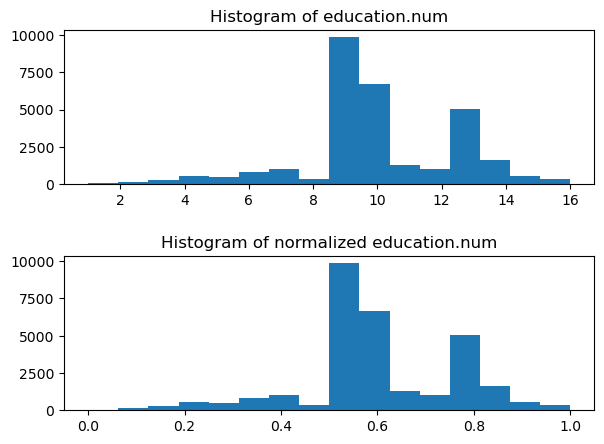

In [293]:
figure, axes = plt.subplots(nrows=2, ncols=1)

#กราฟที่ 1 แสดงความถี่ของ education.num
axes[0].hist(data['education.num'], bins=16)
axes[0].title.set_text('Histogram of education.num')

#กราฟที่ 2 แสดงความถี่ของ normalized_education.num
axes[1].hist(data['normalized_education.num'], bins=16)
axes[1].title.set_text('Histogram of normalized education.num')

figure.tight_layout(pad=2.0)

In [294]:
# Z-score standardization = (value-mean)/sd
print("Mean of education.num =", np.mean(data['education.num']))
print("SD of education.num =", np.std(data['education.num']))
data['standardized_education.num'] = (data['education.num']-np.mean(data['education.num']))/np.std(data['education.num'])
data.head()

Mean of education.num = 10.12131158411246
SD of education.num = 2.5499526468579656


,age,fnlwgt,education,education.num,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week,...,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,encoded_income,normalized_education.num,standardized_education.num
0,82,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,0,4356,18,...,0,0,0,0,1,1,0,0.0,0.533333,-0.439738
1,54,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,0,3900,40,...,0,0,0,0,1,1,0,0.0,0.200000,-2.400559
2,41,264663,Some-college,10,Separated,Prof-specialty,Own-child,0,3900,40,...,0,0,0,0,1,1,0,0.0,0.600000,-0.047574
3,34,216864,HS-grad,9,Divorced,Other-service,Unmarried,0,3770,45,...,0,0,0,0,1,1,0,0.0,0.533333,-0.439738
4,38,150601,10th,6,Separated,Adm-clerical,Unmarried,0,3770,40,...,0,0,0,0,1,0,1,0.0,0.333333,-1.616231


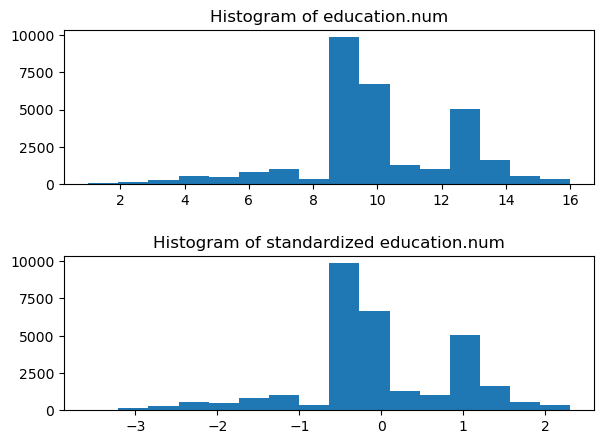

In [295]:
figure, axes = plt.subplots(nrows=2, ncols=1)
axes[0].hist(data['education.num'], bins=16)
axes[0].title.set_text('Histogram of education.num')
axes[1].hist(data['standardized_education.num'], bins=16)
axes[1].title.set_text('Histogram of standardized education.num')
figure.tight_layout(pad=2.0)

ปฏิบัติการข้อ 4) จงแปลงค่าตัวแปร hours.per.week ให้เป็นมาตรฐานด้วยวิธี min-max normalization

In [297]:
# Answer here!
# min-max normalization = (value-min)/(max-min)
print("Minimun hours.per.week =", np.min(data['hours.per.week']))
print("Maximum hours.per.week =", np.max(data['hours.per.week']))
data['normalized_hours.per.week'] = (data['hours.per.week']-np.min(data['hours.per.week']))/(np.max(data['hours.per.week'])-np.min(data['hours.per.week']))
data.head()

Minimun hours.per.week = 1
Maximum hours.per.week = 99


,age,fnlwgt,education,education.num,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week,...,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,encoded_income,normalized_education.num,standardized_education.num,normalized_hours.per.week
0,82,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,0,4356,18,...,0,0,0,1,1,0,0.0,0.533333,-0.439738,0.173469
1,54,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,0,3900,40,...,0,0,0,1,1,0,0.0,0.200000,-2.400559,0.397959
2,41,264663,Some-college,10,Separated,Prof-specialty,Own-child,0,3900,40,...,0,0,0,1,1,0,0.0,0.600000,-0.047574,0.397959
3,34,216864,HS-grad,9,Divorced,Other-service,Unmarried,0,3770,45,...,0,0,0,1,1,0,0.0,0.533333,-0.439738,0.448980
4,38,150601,10th,6,Separated,Adm-clerical,Unmarried,0,3770,40,...,0,0,0,1,0,1,0.0,0.333333,-1.616231,0.397959


ปฏิบัติการข้อ 5) จงแปลงค่าตัวแปร capital.gain ให้เป็นมาตรฐานด้วยวิธี z-score normalization

In [319]:
# Answer here!
# Z-score standardization = (value-mean)/sd
print("Mean of capital.gain =", np.mean(data['capital.gain']))
print("SD of capital.gain =", np.std(data['capital.gain']))
data['standardized_capital.gain'] = (data['capital.gain']-np.mean(data['capital.gain']))/np.std(data['capital.gain'])
data.head()

Mean of capital.gain = 1092.0078575691268
SD of capital.gain = 7406.223719542448


,age,fnlwgt,education,education.num,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week,...,race_Black,race_Other,race_White,sex_Female,sex_Male,encoded_income,normalized_education.num,standardized_education.num,normalized_hours.per.week,standardized_capital.gain
0,82,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,0,4356,18,...,0,0,1,1,0,0.0,0.533333,-0.439738,0.173469,-0.147445
1,54,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,0,3900,40,...,0,0,1,1,0,0.0,0.200000,-2.400559,0.397959,-0.147445
2,41,264663,Some-college,10,Separated,Prof-specialty,Own-child,0,3900,40,...,0,0,1,1,0,0.0,0.600000,-0.047574,0.397959,-0.147445
3,34,216864,HS-grad,9,Divorced,Other-service,Unmarried,0,3770,45,...,0,0,1,1,0,0.0,0.533333,-0.439738,0.448980,-0.147445
4,38,150601,10th,6,Separated,Adm-clerical,Unmarried,0,3770,40,...,0,0,1,0,1,0.0,0.333333,-1.616231,0.397959,-0.147445


ปฏิบัติการข้อ 6) จงแปลงค่าตัวแปร capital.loss ให้เป็นมาตรฐานด้วยวิธี z-score normalization

In [323]:
# Answer here!
# Z-score standardization = (value-mean)/sd
print("Mean of capital.loss =", np.mean(data['capital.loss']))
print("SD of capital.loss =", np.std(data['capital.loss']))
data['standardized_capital.loss'] = (data['capital.loss']-np.mean(data['capital.loss']))/np.std(data['capital.loss'])
data.head()

Mean of capital.loss = 88.37248856176646
SD of capital.loss = 404.29166831586764


,age,fnlwgt,education,education.num,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week,...,race_Other,race_White,sex_Female,sex_Male,encoded_income,normalized_education.num,standardized_education.num,normalized_hours.per.week,standardized_capital.gain,standardized_capital.loss
0,82,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,0,4356,18,...,0,1,1,0,0.0,0.533333,-0.439738,0.173469,-0.147445,10.555814
1,54,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,0,3900,40,...,0,1,1,0,0.0,0.200000,-2.400559,0.397959,-0.147445,9.427915
2,41,264663,Some-college,10,Separated,Prof-specialty,Own-child,0,3900,40,...,0,1,1,0,0.0,0.600000,-0.047574,0.397959,-0.147445,9.427915
3,34,216864,HS-grad,9,Divorced,Other-service,Unmarried,0,3770,45,...,0,1,1,0,0.0,0.533333,-0.439738,0.448980,-0.147445,9.106365
4,38,150601,10th,6,Separated,Adm-clerical,Unmarried,0,3770,40,...,0,1,0,1,0.0,0.333333,-1.616231,0.397959,-0.147445,9.106365


ปฏิบัติการข้อ 7) จงลบ column ของตัวแปร  hours.per.week capital.gain และ capital.loss ที่ยังไม่ได้แปลงค่าให้เป็นมาตรฐานออกจาก dataset

In [331]:
# Answer here!
data = data.drop(columns = ["hours.per.week", "capital.gain", "capital.loss"])
data

,age,fnlwgt,education,education.num,marital.status,occupation,relationship,native.country,income,workclass_Federal-gov,...,race_Other,race_White,sex_Female,sex_Male,encoded_income,normalized_education.num,standardized_education.num,normalized_hours.per.week,standardized_capital.gain,standardized_capital.loss
0,82,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,United-States,<=50K,0,...,0,1,1,0,0.0,0.533333,-0.439738,0.173469,-0.147445,10.555814
1,54,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,United-States,<=50K,0,...,0,1,1,0,0.0,0.200000,-2.400559,0.397959,-0.147445,9.427915
2,41,264663,Some-college,10,Separated,Prof-specialty,Own-child,United-States,<=50K,0,...,0,1,1,0,0.0,0.600000,-0.047574,0.397959,-0.147445,9.427915
3,34,216864,HS-grad,9,Divorced,Other-service,Unmarried,United-States,<=50K,0,...,0,1,1,0,0.0,0.533333,-0.439738,0.448980,-0.147445,9.106365
4,38,150601,10th,6,Separated,Adm-clerical,Unmarried,United-States,<=50K,0,...,0,1,0,1,0.0,0.333333,-1.616231,0.397959,-0.147445,9.106365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,22,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,United-States,<=50K,0,...,0,1,0,1,0.0,0.600000,-0.047574,0.397959,-0.147445,-0.218586
30158,27,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,United-States,<=50K,0,...,0,1,1,0,0.0,0.733333,0.736754,0.377551,-0.147445,-0.218586
30159,40,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,United-States,>50K,0,...,0,1,0,1,1.0,0.533333,-0.439738,0.397959,-0.147445,-0.218586
30160,58,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,United-States,<=50K,0,...,0,1,1,0,0.0,0.533333,-0.439738,0.397959,-0.147445,-0.218586
